In [5]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential

import pathlib

import os

In [6]:
import sys
import platform
print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")
print(f"Python {sys.version}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: Linux-5.4.0-122-generic-x86_64-with-glibc2.31
Tensor Flow Version: 2.9.1
Keras Version: 2.9.0
Python 3.9.13 (main, May 23 2022, 22:01:06) 
[GCC 9.4.0]
GPU is available


*/*.JPG, */*.jpg and */*.* all return different values, meaning the dataset has different file types

In [7]:
train_dir = pathlib.Path('dataset/train')
val_dir = pathlib.Path('dataset/valid')


train_count = len(list(train_dir.glob('*/*.*')))
val_count = len(list(val_dir.glob('*/*.*')))
print(train_count)
print(val_count)


25835
6678


In [8]:
# bacterial_spot = list(data_dir.glob('Tomato___Bacterial_spot/*'))
# early_blight = list(data_dir.glob('Tomato___Early_blight/*'))
# healthy = list(data_dir.glob('Tomato___healthy/*'))
# late_blight = list(data_dir.glob('Tomato___Late_blight/*'))
# leaf_mold = list(data_dir.glob('Tomato___Leaf_Mold/*'))
# septoria_leaf_spot = list(data_dir.glob('Tomato___Septoria_leaf_spot/*'))
# spider_mites = list(data_dir.glob('Tomato___Spider_mites Two-spotted_spider_mite/*'))
# target_spot = list(data_dir.glob('Tomato___Target_Spot/*'))
# mosaic = list(data_dir.glob('Tomato___Tomato_mosaic_virus/*'))
# yellow_leaf_curl = list(data_dir.glob('Tomato___Tomato_Yellow_Leaf_Curl_Virus/*'))

# for img in yellow_leaf_curl:
#     arr = np.array(PIL.Image.open(img))
#     if not (arr.shape == (256, 256, 3)):
#         raise Exception

# subfolders = [ f.path for f in os.scandir('dataset/train') if f.is_dir() ]
# for subdir in subfolders:
#     print(subdir)
#     for file in os.listdir(subdir):
#         if not (file.endswith(".jpg") or file.endswith('JPG') or file.endswith('png') or file.endswith('jpeg')):
#             print(file)
            
    # PIL.Image.open(str(imgs[0]))


# import imghdr

# data_dir = "dataset/valid/Bacterial_spot"
# image_extensions = [".png", ".jpg", "jpeg", "JPG"]  # add there all your images file extensions

# img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
# for filepath in pathlib.Path(data_dir).rglob("*"):
#     if filepath.suffix.lower() in image_extensions:
#         img_type = imghdr.what(filepath)
#         if img_type is None:
#             print(f"{filepath} is not an image")
#             os.unlink(filepath)
#         elif img_type not in img_type_accepted_by_tf:
#             print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
#             os.unlink(filepath)

from os import listdir
import cv2

#for filename in listdir('C:/tensorflow/models/research/object_detection/images/train'):
yourDirectory = 'dataset/valid/'
corrupted = []
for folder in listdir(yourDirectory):
    print(folder)
    for filename in listdir(yourDirectory+folder):
        # if filename.endswith(".jpg"):
        # print(yourDirectory+filename)
        #cv2.imread('C:/tensorflow/models/research/object_detection/images/train/'+filename)
        try:
            cv2.imread(yourDirectory+folder+'/'+filename)
            # print(filename)
        except:
            print(filename)
            corrupted.add(filename)

print(corrupted)

Tomato_Yellow_Leaf_Curl_Virus
healthy
Late_blight
Septoria_leaf_spot
Leaf_Mold
Tomato_mosaic_virus
Spider_mites Two-spotted_spider_mite
powdery_mildew
Early_blight
Bacterial_spot
Target_Spot
[]


In [9]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  val_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 25835 files belonging to 11 classes.
Found 6678 files belonging to 11 classes.


In [10]:
class_names = train_ds.class_names
print(class_names)

['Bacterial_spot', 'Early_blight', 'Late_blight', 'Leaf_Mold', 'Septoria_leaf_spot', 'Spider_mites Two-spotted_spider_mite', 'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_mosaic_virus', 'healthy', 'powdery_mildew']


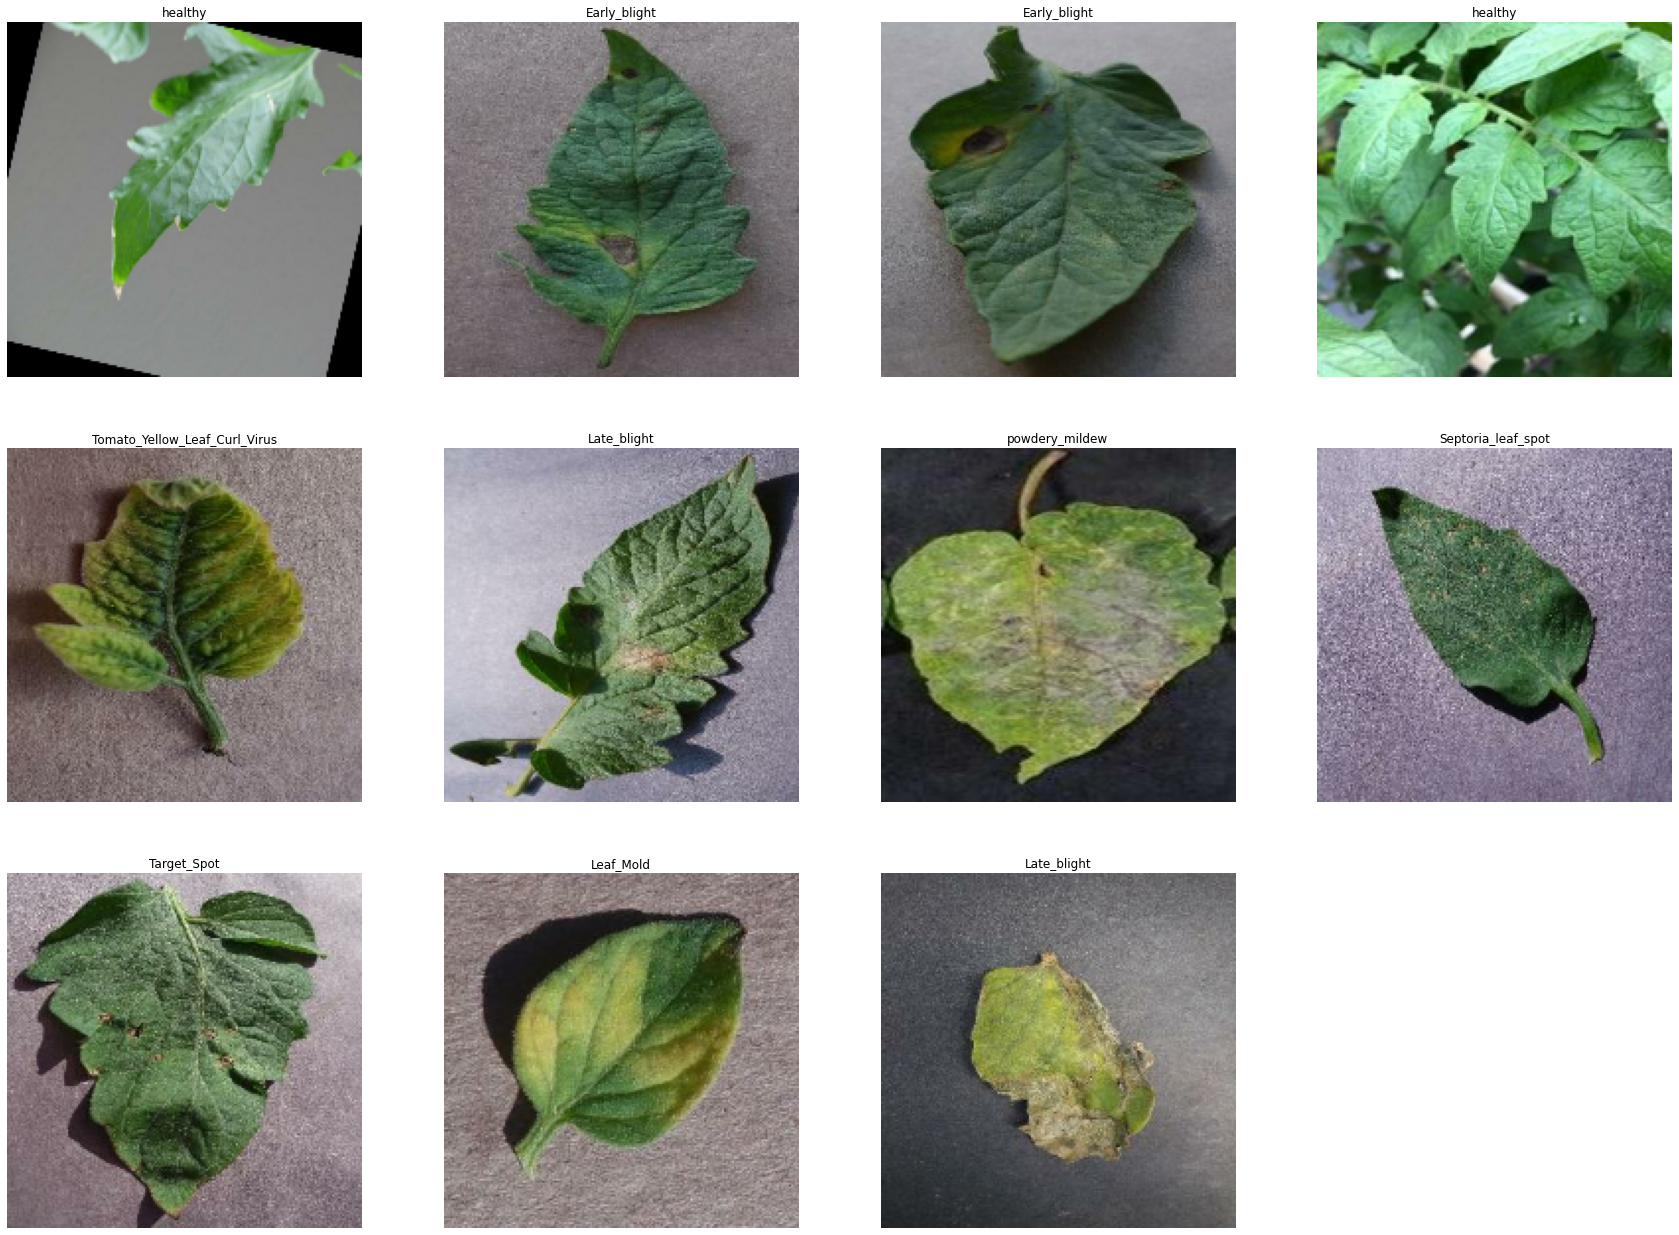

In [11]:
plt.figure(figsize=(30, 30))
for images, labels in train_ds.take(1):
  for i in range(11):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [12]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [13]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [14]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    # layers.RandomCrop(img_height, img_width),
    # layers.RandomTranslation(height_factor=(-0.2, 0.3), width_factor=(-0.2, 0.3))
  ]
)

In [ ]:
# plt.figure(figsize=(30, 30))
# for images, _ in train_ds.take(1):
#   for i in range(11):
#     augmented_images = data_augmentation(images)
#     ax = plt.subplot(4, 4, i + 1)
#     plt.imshow(augmented_images[0].numpy().astype("uint8"))
#     plt.axis("off")

In [15]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
808/808 [==============================] - 100s 77ms/step - loss: 1.3045 - accuracy: 0.5407 - val_loss: 1.1823 - val_accuracy: 0.6159
Epoch 2/50
808/808 [==============================] - 56s 70ms/step - loss: 0.7911 - accuracy: 0.7238 - val_loss: 0.8846 - val_accuracy: 0.7150
Epoch 3/50
808/808 [==============================] - 58s 72ms/step - loss: 0.6721 - accuracy: 0.7638 - val_loss: 0.9153 - val_accuracy: 0.7059
Epoch 4/50
808/808 [==============================] - 57s 70ms/step - loss: 0.5898 - accuracy: 0.7940 - val_loss: 0.5112 - val_accuracy: 0.8182
Epoch 5/50
808/808 [==============================] - 58s 72ms/step - loss: 0.5293 - accuracy: 0.8123 - val_loss: 1.5079 - val_accuracy: 0.6325
Epoch 6/50
808/808 [==============================] - 56s 70ms/step - loss: 0.4980 - accuracy: 0.8220 - val_loss: 0.6698 - val_accuracy: 0.7880
Epoch 7/50
808/808 [==============================] - 57s 70ms/step - loss: 0.4626 - accuracy: 0.8358 - val_loss: 0.5430 - val_accuracy

In [18]:
result = model.evaluate(val_ds)
print(result)

209/209 [==============================] - 4s 18ms/step - loss: 0.3024 - accuracy: 0.9158
[0.3024418354034424, 0.9158430695533752]


In [19]:
import datetime

# print(str(datetime.datetime.now()))
model.save('saved_model/model'+str(datetime.datetime.now()))

INFO:tensorflow:Assets written to: saved_model/model2023-02-17 14:48:59.615275/assets


INFO:tensorflow:Assets written to: saved_model/model2023-02-17 14:48:59.615275/assets


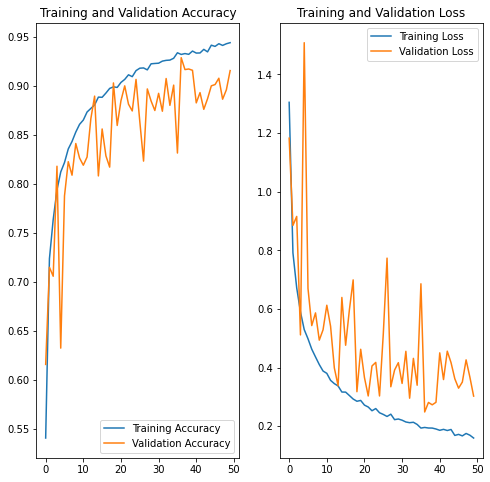

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
model.evaluate(val_ds)

209/209 [==============================] - 4s 19ms/step - loss: 0.3024 - accuracy: 0.9158


[0.3024418354034424, 0.9158430695533752]

CLASSIFY NEW DATA

In [26]:
# leaf_path = pathlib.Path('sample_data/mosaic2.png')

# img = tf.keras.utils.load_img(
#     leaf_path, target_size=(img_height, img_width)
# )
# img_array = tf.keras.utils.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0) # Create a batch

# predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score)], 100 * np.max(score))
# )
leaf_path = pathlib.Path('/notebooks/sample_data/IMG_4153.jpeg')
leaf_dir = pathlib.Path('/notebooks/sample_data')
for leaf in list(leaf_dir.glob('*')):
    img = tf.keras.utils.load_img(
        pathlib.Path(leaf), target_size=(img_height, img_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(
        "{}: {} with a {:.2f} percent confidence."
        .format(leaf, class_names[np.argmax(score)], 100 * np.max(score))
    )

1/1 [==============================] - 0s 23ms/step
/notebooks/sample_data/IMG_4151.jpeg: Septoria_leaf_spot with a 66.35 percent confidence.
1/1 [==============================] - 0s 21ms/step
/notebooks/sample_data/septoria-leaf-spot-tomato-2.jpg: Septoria_leaf_spot with a 76.42 percent confidence.
1/1 [==============================] - 0s 25ms/step
/notebooks/sample_data/powderymildew1.jpg: Late_blight with a 92.06 percent confidence.
1/1 [==============================] - 0s 26ms/step
/notebooks/sample_data/bacterialspot1.jpg: Bacterial_spot with a 74.98 percent confidence.
1/1 [==============================] - 0s 24ms/step
/notebooks/sample_data/IMG_4152.jpeg: Bacterial_spot with a 97.41 percent confidence.
1/1 [==============================] - 0s 22ms/step
/notebooks/sample_data/leafmold3.jpg: healthy with a 40.59 percent confidence.
1/1 [==============================] - 0s 22ms/step
/notebooks/sample_data/IMG_4198.jpeg: healthy with a 99.93 percent confidence.
1/1 [==========